In [2]:
import numpy as np
import pandas as pd

data = pd.read_csv(r'E:\S-4\CSOC\mobile price prediction\train_data.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
pd.isnull(data).sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

In [10]:
y = data['price_range']
X = data.drop('price_range',axis =1)


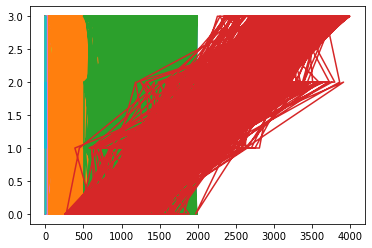

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [32]:
classifier = svm.SVC(kernel = "poly")
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [34]:
print("accuracy: ", metrics.accuracy_score(y_test,y_pred=pred))
print("Classification report: ",metrics.classification_report(y_test,pred))


accuracy:  0.96
Classification report:                precision    recall  f1-score   support

           0       0.99      1.00      0.99       155
           1       0.96      0.97      0.96       151
           2       0.93      0.93      0.93       149
           3       0.96      0.94      0.95       145

    accuracy                           0.96       600
   macro avg       0.96      0.96      0.96       600
weighted avg       0.96      0.96      0.96       600



In [36]:
import pickle

In [38]:
pickle.dump(classifier, open('Mobile_Price_Prediction.pkl', 'wb'))


In [44]:
Mobile_Price_Prediction = pickle.load(open('Mobile_Price_Prediction.pkl', 'rb'))
#print(Mobile_Price_Prediction.predict([[42,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1]]))

[0]
